Dataset Link -  https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
houseData = pd.read_csv("C:\\Users\\PC\\Desktop\\Python\\Dataset\\Housing.csv")
houseData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
houseData.shape

(545, 13)

In [4]:
houseData.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
houseData.duplicated().sum()

0

In [7]:
houseData.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
categorical_list = [x for x in houseData.columns if houseData[x].dtype =='object']

In [9]:
categorical_list

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [10]:
houseData['mainroad'] = houseData['mainroad'].map({'yes': 1, 'no': 0})
houseData['guestroom'] = houseData['guestroom'].map({'yes': 1, 'no': 0})
houseData['basement'] = houseData['basement'].map({'yes': 1, 'no': 0})
houseData['hotwaterheating'] = houseData['hotwaterheating'].map({'yes': 1, 'no': 0})
houseData['airconditioning'] = houseData['airconditioning'].map({'yes': 1, 'no': 0})
houseData['prefarea'] = houseData['prefarea'].map({'yes': 1, 'no': 0})
houseData['furnishingstatus'] = houseData['furnishingstatus'].map({'unfurnished': 0,
                                                                   'semi-furnished': 1, 'furnished': 2})

In [11]:
houseData

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


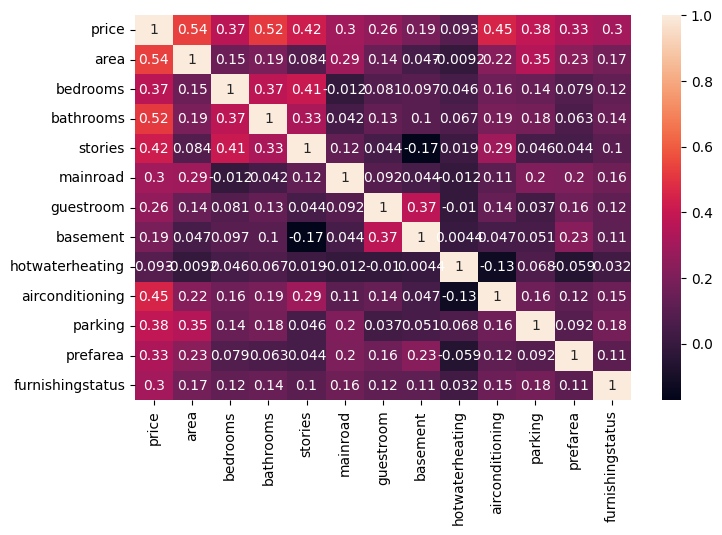

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(houseData.corr(),annot=True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = houseData.drop('price', axis=1)
y = houseData['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2: ", r2_score(y_test, y_pred))

RMSE : 1331071.4167895103
R^2:  0.6494754192267804


In [16]:
model_preds = model.predict(X_test)

In [17]:
print(model.intercept_)
print(model.coef_)

-127711.16739244293
[2.35848772e+02 7.85744924e+04 1.09711727e+06 4.06223164e+05
 3.66824192e+05 2.33146766e+05 3.93159779e+05 6.87881311e+05
 7.85550579e+05 2.25756514e+05 6.29901661e+05 2.10397118e+05]


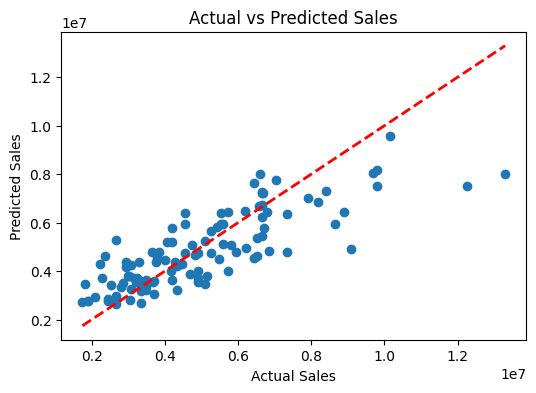

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, model_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [19]:
predicted_price = model.predict([[3620,2	,1	,1	,1	,0	,0	,0	,0	,0	,0	,0]])
print(predicted_price)

[2753374.99425914]


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
